# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np 

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(np.concatenate((y_train,y_test,y_valid))).shape[0]



print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Total number of images =", n_train+n_validation+n_test)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Total number of images = 51839


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

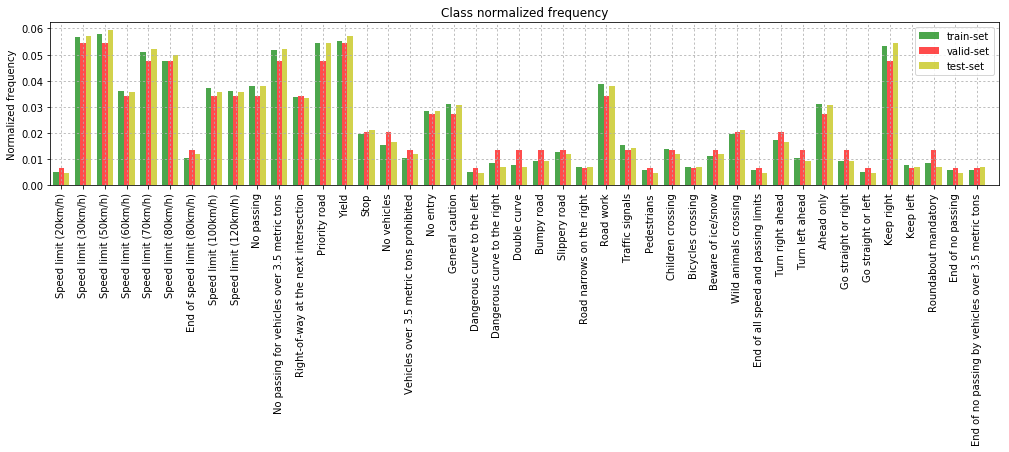

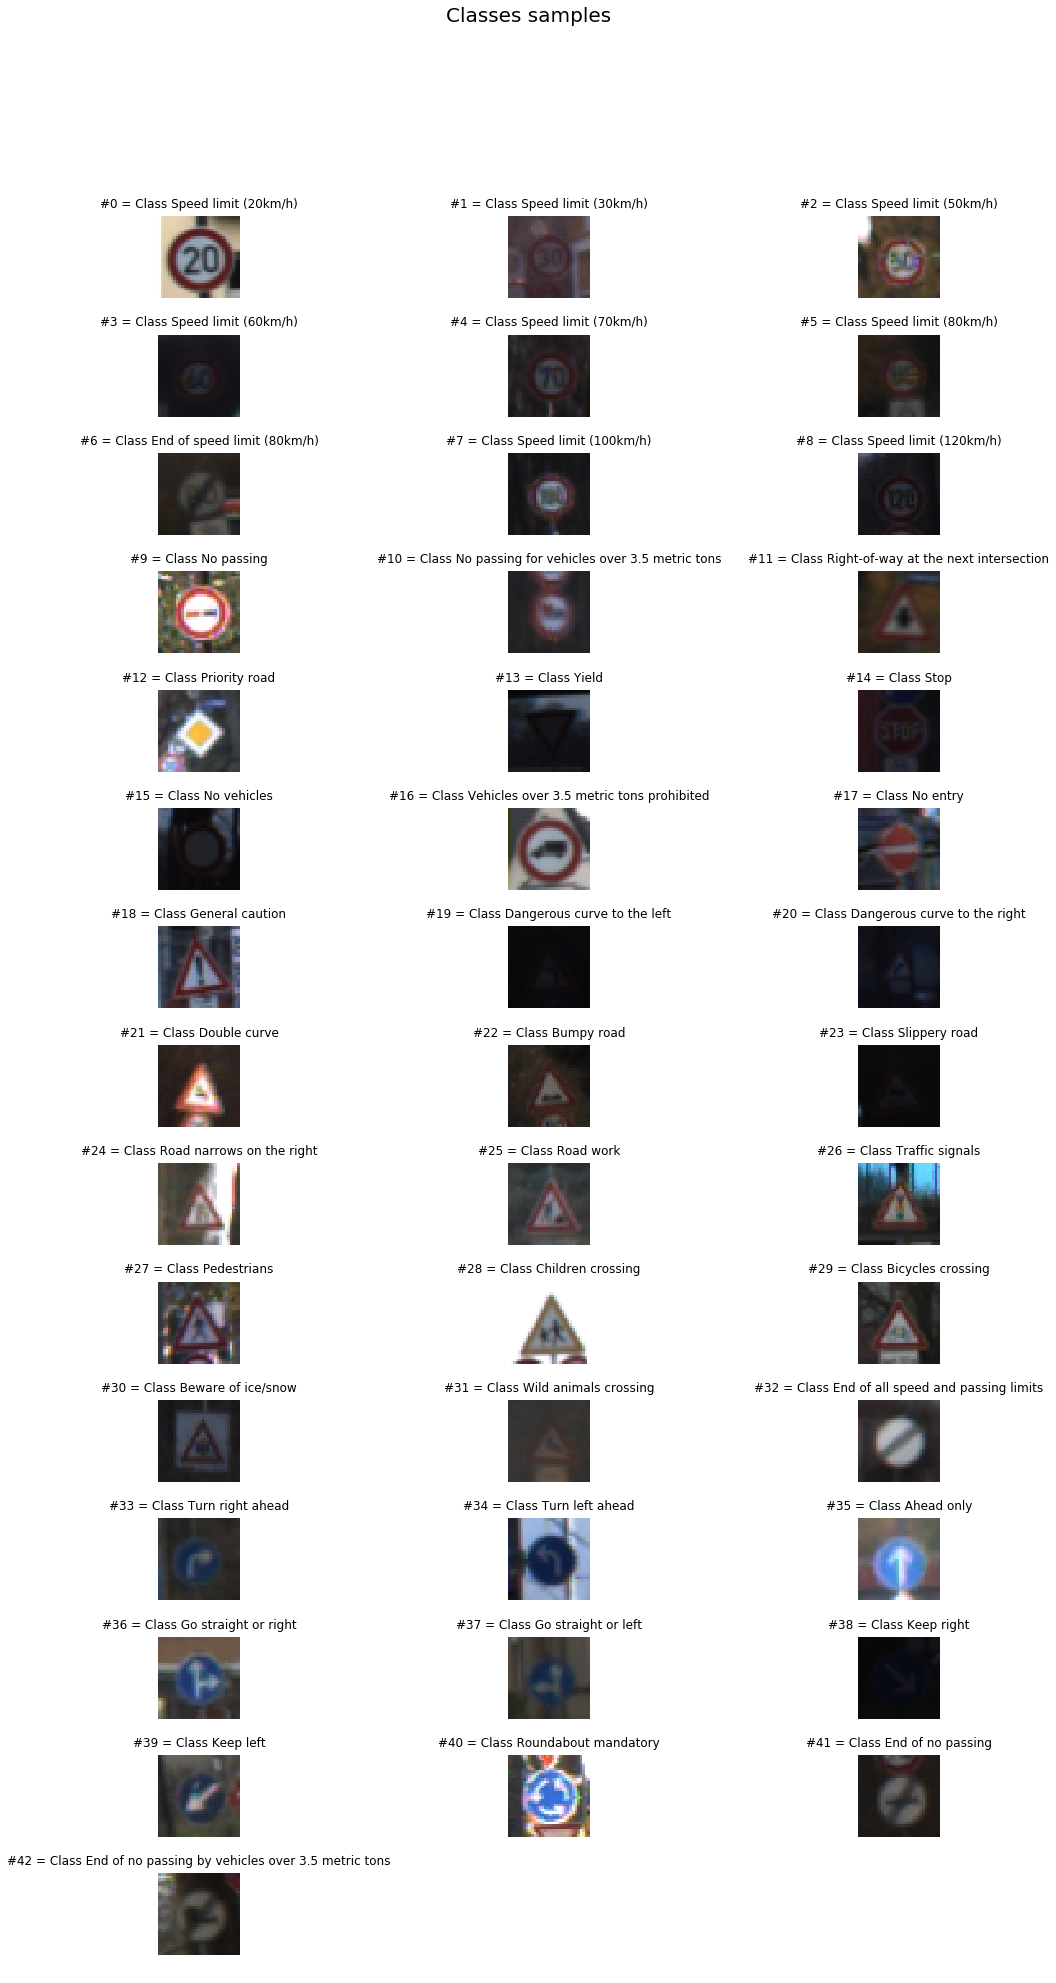

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
# Visualizations will be shown in the notebook.
%matplotlib inline


# read csv
class2name = dict()
with open('signnames.csv','r') as fd:
    fd.readline()# skip first line
    for line in fd:
        line=line.rstrip()
        splits = line.split(',')
        class2name[int(splits[0])]=splits[1]
        

# let us get the targets, their indices and their counts
targets, indices, counts = np.unique(y_train, return_index=True, return_counts=True)
_,  counts_test = np.unique(y_test,  return_counts=True)
_, counts_valid = np.unique(y_valid, return_counts=True)




# # plot frequency
fig,ax = plt.subplots(1,1, figsize=(17, 3),  sharex=True, sharey=True)

## the data
## necessary variables
ind = np.arange(n_classes)                # the x locations for the groups
width = 0.25                      # the width of the bars

## the bars
rects1 = ax.bar(ind, counts/counts.sum(), width, color='g', alpha=0.7, label='train-set')
rects2 = ax.bar(ind+width, counts_valid/counts_valid.sum(), width, color='r', alpha=0.7 , label='valid-set')
rects3 = ax.bar(ind+2*width, counts_test/counts_test.sum(), width, color='y', alpha=0.7 , label='test-set')


# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_title('Class normalized frequency')
xTickMarks = [class2name[v] for v in targets]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
ax.grid(linestyle='dotted')

ax.legend()

ax.set_ylabel('Normalized frequency')

# Let us plot some samples of classes
fig,axs = plt.subplots(15,3, figsize=(15, 25),  sharex=True, sharey=True)
axs = axs.reshape(-1)
fig.suptitle('Classes samples', fontsize=20, y=1.1)

for i,ax in enumerate(axs):
    ax.axis('off')
    if i < n_classes:
        ax.imshow(X_train[indices[i]])
        ax.set_title('#{} = Class {}'.format(i,class2name[i]))

plt.tight_layout()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [5]:
def one_hot_encode(x, n_classes):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    x=np.array(x)
    one_hot=np.zeros((x.shape[0],n_classes))
    one_hot[range(x.shape[0]),x]=1
    return one_hot

In [6]:
y_train = one_hot_encode(y_train, n_classes)
y_valid = one_hot_encode(y_valid, n_classes)
y_test = one_hot_encode(y_test, n_classes)

In [7]:

X_train =X_train/255
X_valid =X_valid/255
X_test =X_test/255


from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Aux functions for model

In [8]:
import tensorflow as tf
import numpy as np

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    tensorshape = [None]+ list(image_shape)
    return tf.placeholder(tf.float32, tensorshape, name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    return tf.placeholder(tf.float32, [None, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder(tf.float32, name='keep_prob')


In [9]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # NUmber of features maps in input
    input_fm = int(x_tensor.get_shape()[-1])
    # Weight
    W = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[0], input_fm , conv_num_outputs],mean=0.0, stddev=0.1))
    # Bias
    b = tf.Variable(tf.truncated_normal([conv_num_outputs],mean=0.0, stddev=0.1))
    
    # Convolution
    x = tf.nn.conv2d(x_tensor, W, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    
    # Activation 
    x = tf.nn.relu(x)
    
    # Max Pooling
    x = tf.nn.max_pool(x, ksize = [1, pool_ksize[0], pool_ksize[1], 1],
                          strides = [1, pool_strides[0], pool_strides[1], 1],
                          padding = 'SAME') 
    print(x_tensor.get_shape(),x.get_shape())
    return x 

In [10]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    shape = x_tensor.get_shape().as_list()
    dim = np.prod(shape[1:])           
    return tf.reshape(x_tensor, [-1, dim])

In [11]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # Weight
    input_fm = int(x_tensor.get_shape()[-1])
    W = tf.Variable(tf.truncated_normal([input_fm , num_outputs],mean=0.0, stddev=0.1))
    # Bias
    b = tf.Variable(tf.truncated_normal([num_outputs],mean=0.0, stddev=0.1))

    
    # Fully Connected
    x = tf.add(tf.matmul(x_tensor, W), b)
    
    # Activation
    x = tf.nn.relu(x)
    return x

In [12]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # Weight
    input_fm = int(x_tensor.get_shape()[-1])
    W = tf.Variable(tf.truncated_normal([input_fm , num_outputs],mean=0.0, stddev=0.1))
    # Bias
    b = tf.Variable(tf.truncated_normal([num_outputs],mean=0.0, stddev=0.1))

    
    # Fully Connected
    x = tf.add(tf.matmul(x_tensor, W), b)
    return x


In [13]:
def conv_net(x, keep_prob, n_classes):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    act = conv2d_maxpool(x, 32,  (3,3), (1,1), (1,1), (1,1))
    x = conv2d_maxpool(act, 64,  (3,3), (1,1), (1,1), (1,1))
    x = conv2d_maxpool(x, 128,  (3,3), (1,1), (2,2), (1,1))
    

    x = flatten(x)
    

    
    x = fully_conn(x, 256)
    x = tf.nn.dropout(x, keep_prob)
    x = fully_conn(x, 256)
    x = tf.nn.dropout(x, keep_prob)
    
    x = output(x, n_classes)
    
    
    return x,act

### Build Network

In [14]:
# Hyper Parameters
epochs = 60
batch_size = 512
keep_probability = 0.55
lr = 0.001

############

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(n_classes)
keep_prob = neural_net_keep_prob_input()
# Model
logits, act = conv_net(x, keep_prob, n_classes)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

#saver
saver = tf.train.Saver()


(?, 32, 32, 3) (?, 32, 32, 32)
(?, 32, 32, 32) (?, 32, 32, 64)
(?, 32, 32, 64) (?, 32, 32, 128)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    
    session.run(optimizer, feed_dict={ x: feature_batch, y: label_batch, keep_prob: keep_probability})


In [16]:
def evaluate(X_data, y_data, BATCH_SIZE):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        ACC = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y,  keep_prob:1})
        total_accuracy += (ACC * len(batch_x))
    return total_accuracy / num_examples

In [17]:
import random
import scipy.ndimage as SPND

def data_aug(image):
    option = random.randrange(2)
    if option == 0 :
        return image
    elif option ==1:
        # Random rotation
        angle = np.random.uniform(20,20,1)
        return SPND.rotate((image), angle, reshape=False)

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            AUG_X = np.array([data_aug(image) for image in batch_x])
                
            train_neural_network(sess, optimizer, keep_probability, AUG_X, batch_y)
            
        train_acc = evaluate(X_train, y_train, batch_size)
        val_acc = evaluate(X_valid, y_valid, batch_size)
        print("Epcoh {} Accuracies  -- Training set   {:.3f}  |  Validation set  {:.3f}".format(i+1,train_acc,val_acc))
        
    saver.save(sess, './customnet')
    print("Model saved")
        


Training...

Epcoh 1 Accuracies  -- Training set   0.122  |  Validation set  0.110
Epcoh 2 Accuracies  -- Training set   0.198  |  Validation set  0.176
Epcoh 3 Accuracies  -- Training set   0.348  |  Validation set  0.320
Epcoh 4 Accuracies  -- Training set   0.444  |  Validation set  0.381
Epcoh 5 Accuracies  -- Training set   0.478  |  Validation set  0.428
Epcoh 6 Accuracies  -- Training set   0.527  |  Validation set  0.463
Epcoh 7 Accuracies  -- Training set   0.528  |  Validation set  0.476
Epcoh 8 Accuracies  -- Training set   0.585  |  Validation set  0.530
Epcoh 9 Accuracies  -- Training set   0.588  |  Validation set  0.529
Epcoh 10 Accuracies  -- Training set   0.652  |  Validation set  0.582
Epcoh 11 Accuracies  -- Training set   0.644  |  Validation set  0.585
Epcoh 12 Accuracies  -- Training set   0.680  |  Validation set  0.611
Epcoh 13 Accuracies  -- Training set   0.698  |  Validation set  0.634
Epcoh 14 Accuracies  -- Training set   0.722  |  Validation set  0.669
Ep

### Perfomance on test set:

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, batch_size)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./customnet
Test Accuracy = 0.967


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

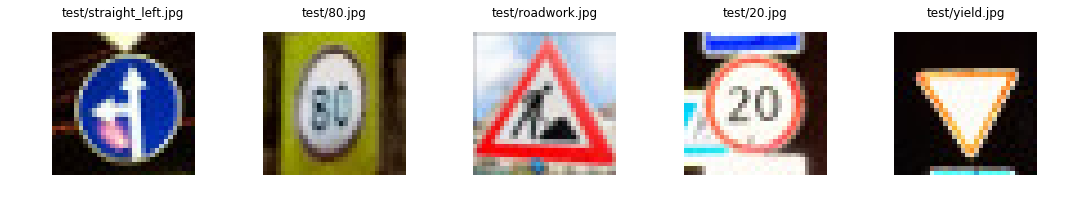

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
from scipy.misc import imread
images = []
names = []
for l in glob.iglob('test/*.jpg'):
    images.append(imread(l))
    names.append(l)
images=np.array(images)

# Let us plot some samples of classes
fig,axs = plt.subplots(1,5, figsize=(15, 3),  sharex=True, sharey=True)
axs = axs.reshape(-1)

for i,ax in enumerate(axs):
    ax.axis('off')
    ax.imshow(images[i])
    ax.set_title('{}'.format(names[i]))

plt.tight_layout()

In [21]:
# NOrmalize data
images=images/255
images_gt= [37,5,25,0,13]
images_gt = one_hot_encode(images_gt,n_classes)
images_gt.shape

(5, 43)

### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


INFO:tensorflow:Restoring parameters from ./customnet


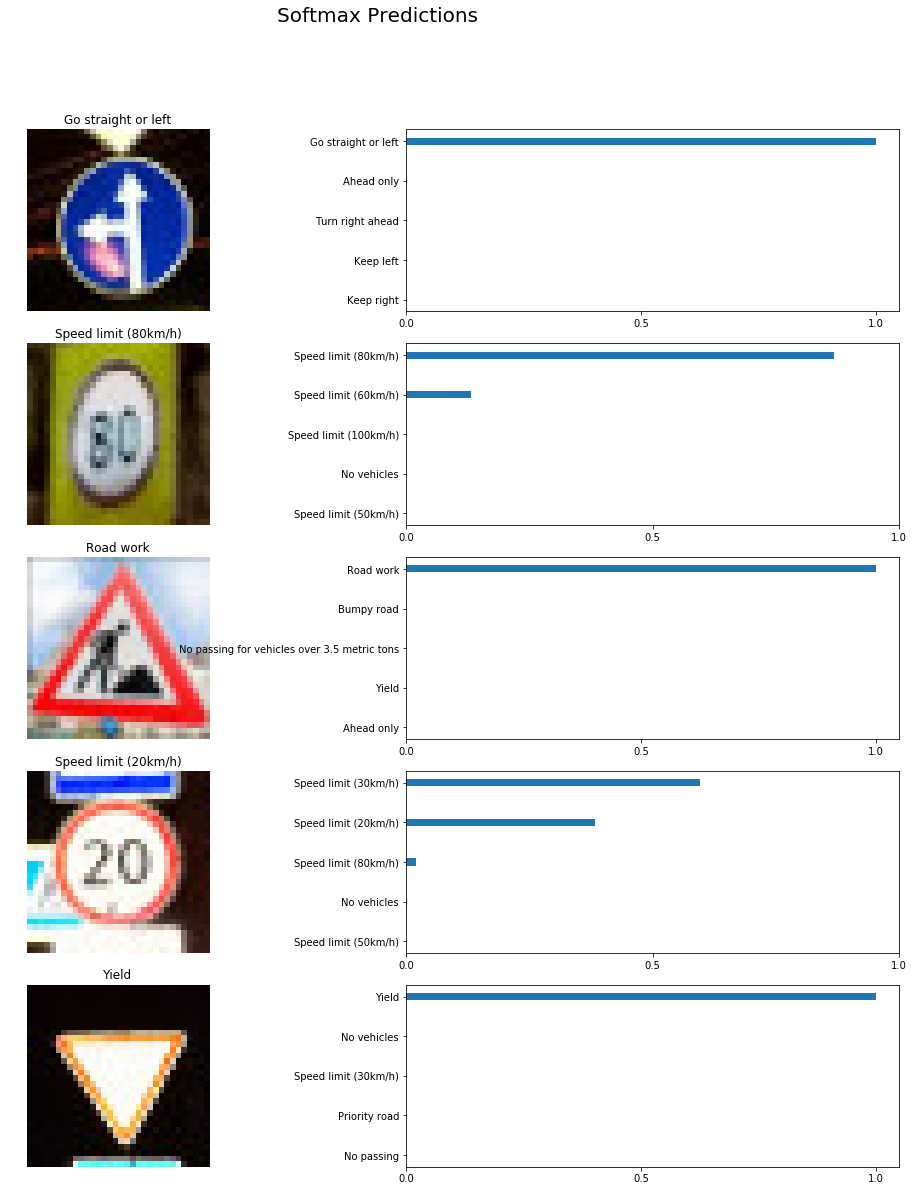

In [23]:
n_predictions = 5

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    saver.restore(sess, tf.train.latest_checkpoint('.'))

    predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=n_predictions),
            feed_dict={x: images, y: images_gt,  keep_prob:1})
    
    acc = sess.run(accuracy, feed_dict={x: images, y: images_gt,  keep_prob:1})

    
fig, axies = plt.subplots(nrows=n_predictions, ncols=2, figsize=(15, 15),)
fig.tight_layout()
fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

margin = 0.05
ind = np.arange(n_predictions)
width = (1. - 2. * margin) / n_predictions

for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(images, images_gt, predictions.indices, predictions.values)):
    pred_names = [class2name[pred_i] for pred_i in pred_indicies]
    correct_name = class2name[label_id.argmax()]

    axies[image_i][0].imshow(feature)
    axies[image_i][0].set_title(correct_name)
    axies[image_i][0].set_axis_off()

    axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
    axies[image_i][1].set_yticks(ind + margin)
    axies[image_i][1].set_yticklabels(pred_names[::-1])
    axies[image_i][1].set_xticks([0, 0.5, 1.0])
    
    

### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print(' Our test accuracy is {:.3f}%'.format(acc*100))

 Our test accuracy is 80.000%


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [25]:
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    
    with tf.Session() as sess:
    
        sess.run(tf.global_variables_initializer())

        saver.restore(sess, tf.train.latest_checkpoint('.'))

        activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(15,15))
        for featuremap in range(featuremaps):
            plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")


INFO:tensorflow:Restoring parameters from ./customnet


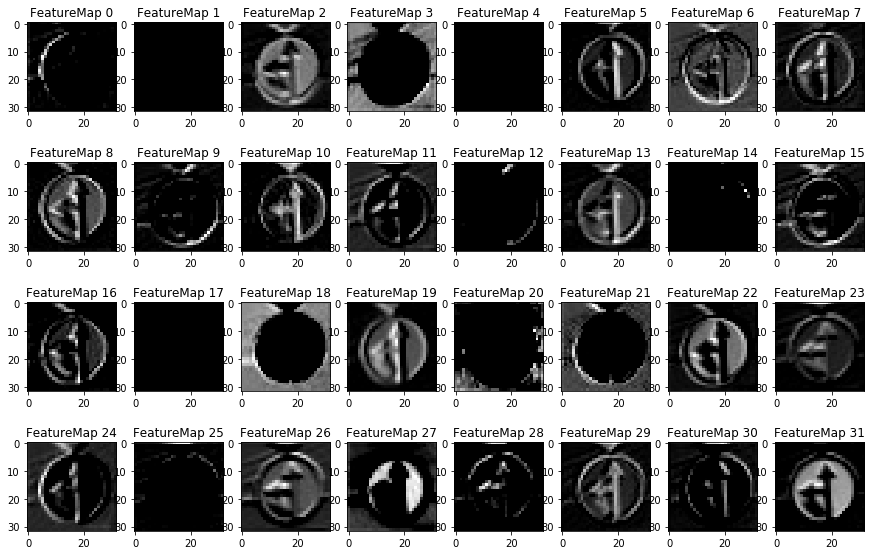

In [26]:
outputFeatureMap(images[0:1],act)